# NairaLand Forum Members' Birthday Data

**Analysis and Visualization of Today's Birthday Data of NairaLand.com forum Members!**

This experiment is valid for today.

Which mean that only the NairaLand forum Members whose birthday is today and are registered on NairaLand before now will have their data Analyzed and Visualized.

<b style="color:red">Note: If you run this script Tomorrow, you will get different data and results. <br />Since a birthday is just once in a year different members will celebrate their birthday on different days.</b>

Author: <a href="http://www.umaryusuf.com">Umay Yusuf.</a> Read the <a href="http://umar-yusuf.blogspot.com.ng/2016/08/Data-Srapping-Analysis-and-Visualization-with-Python.html">blog post here.</a>

# Table of Conents

1) Scrap birthday data from Nairaland home page

2) Clean the data into a friendly format

3) Analyze and Visualize the data

# ====== Section One ======

# 1) Scrap birthday data from Nairaland home page

**Note:: You can increase your work load and skip this section by copying and editing data manually**

The home page url is at: http://www.nairaland.com/home#featured. If you scroll down the page, you will see the list of members having their Birthday today!

The list is in this format: rodbel(29), Sirolad(29), mokei(27)... The first word is the username of the member and his age in braces. That is: <strong>member_username(age)</strong>

The format above isn't useful in python, so we need to clean it into a tabular format useful in python.

Note: If you inspect the html of the Birthday list, you should see that it is contained in a cell of table tag (< td > ......... < /td >).

See sample Birthday list on nairaland.com below;-

<img src="https://2.bp.blogspot.com/-FrimAg6bIts/V7XZg_rir3I/AAAAAAAABFY/JKfvcnRiHusAEWTTfF7Rytj0fWQ2duvVACLcB/s1600/Sample_NL_Birthdays.bmp" />

<strong style="color:red">In Summary:</strong> We want to scrap data from this format "rodbel(29), Sirolad(29), mokei(27)" into tabular format.

In [1]:
# import the libraries we are going to use

# libraries for Scraping and Cleaning the data
import re
import requests
from bs4 import BeautifulSoup


# libraries for Analyzing and Visualizing the data
import pandas as pd
from datetime import datetime


In [2]:
# Scraping out the raw html code of nairaland home page
url = "http://www.nairaland.com/home"
raw_html = requests.get(url) # returns the complete url html code

# print (raw_html.text)

raw_data = raw_html.text  # save the text in an object

soup_data = BeautifulSoup(raw_data, "lxml") # use BeautifulSoup module read the html into xml to and save it in an object


In [3]:
# lets display only the part of the data we need. It is contained in the cell of table tag (<td>)

soup_data("td")

[<td class="grad"><h1><a class="g" href="http://www.nairaland.com/" title="Nairaland Nigerian Forum">₦airaland Forum</a></h1> Welcome, <b>Guest</b>: <b><a href="/register">Join Nairaland</a></b> / <a href="/login">Login</a> / <a href="/trending">Trending</a> / <a href="/recent">Recent</a> / <a href="/topics">New</a><br/><b>Stats: </b>1,637,780 members, 3,033,792 topics. <b>Date</b>: Friday, 19 August 2016 at 12:02 PM<p></p><form action="/search"> <input name="q" size="32" type="text"/>
 <input name="search" type="submit" value="Search"/></form> </td>,
 <td class="l w"><a href="/nairaland" title=" class=g"><b>Nairaland / General</b></a>: <a href="/politics" title="Our country Nigeria is the giant of Africa!"><b>Politics</b></a>, <a href="/crime" title=""><b>Crime</b></a>, <a href="/romance" title="Discuss dating, courtship, and romance in marriage."><b>Romance</b></a>, <a href="/jobs" title="Job/Employment Opportunities; Vacancies In Nigeria!"><b>Jobs/Vacancies</b></a>, <a href="/career

# ====== Section Two ======

# 2) Clean the data into a friendly format

Let extract all irrelevant text and keep only the birthday list in the format of: <strong>Username, age</strong>. To be saved in a CSV file

In [4]:
# lets read out the text only ignoring the tag cell in a table
for data in soup_data("td"):
    print (data.text)

₦airaland Forum Welcome, Guest: Join Nairaland / Login / Trending / Recent / NewStats: 1,637,780 members, 3,033,792 topics. Date: Friday, 19 August 2016 at 12:02 PM 
 
Nairaland / General: Politics, Crime, Romance, Jobs/Vacancies, Career, Business, Investment, NYSC, Education, Autos, Car Talk, Properties, Health, Travel, Family, Culture, Religion, Food, Diaries, Nairaland Ads, Pets, Agriculture
Entertainment: Jokes Etc, TV/Movies, Music/Radio, Celebrities, Fashion, Events, Sports, Gaming, Forum Games, Literature
Science/Technology: Programming, Webmasters, Computers, Phones, Art, Graphics & Video, Technology Market
 Featured Links / Twitter  / Facebook  / How To Advertise 
 » Usain Bolt Wins 200m Gold At The RIO 2016 Olympics: His 8th Olympic Gold (Photos) «» See How Tattoo Damaged The Skin Of Actress Anita Joseph (Pics) «» Naira Sinks To All-Time Low Of 365.25/Dollar «» "See The Bush Meat A Friend And I Killed" - Hillarie (Photos) «» US Secretary Of State, John Kerry, To Visit Nigeria

In [5]:
# Obviously, we don't need every text above. So use the 're' module, to extract only the relevant birthday list

# Note: I will ignore those members whose ages are not displayed, so that we don't have to deal with NaN values in our data


member_found = None

re_match = "[\w]+\([\d]+\)" # any word count+1 followed-by '(' followed-by any number count+1 followed-by ')'

for data in soup_data("td"):
    data_found = re.findall(re_match, data.text)
    
    if data_found:
        member_found = data_found

print (member_found)

['gabng(31)', 'olaeffect(40)', 'seunny4lif(29)', 'Samdurance(33)', 'Nazcoj(29)', 'uyilee(32)', 'yusuf01(32)', 'meetdopi(47)', 'daprophet(83)', 'jaittofidelix1(28)', 'TheRector(39)', 'faisal00(30)', 'globigpun(36)', 'Nerosoft19(22)', 'Havilah93(23)', 'passthem(28)', 'Bolt2011(29)', 'debbianah(25)', 'elemzyfinest(23)', 'Ayodeji1908(32)', 'aitanofi(36)', 'jibolarazor(24)', 'wemicoal(24)', 'Mexyz(24)', 'amyboy(26)', 'yemcoguy(31)', 'jendoslim(29)', 'oluebubesyd(20)', 'mustymatic(24)', 'izy4all(95)', 'omoga1908(32)', 'mojibbz(21)', 'endibe(24)', 'nolaniyonu(28)', 'shinacollins(38)', 'tolam4skywd(21)', 'Kenkesh(28)', 'Chibaba247(29)', 'emperorhenry(26)', 'samuelkingz(21)', 'lordkizzy3(18)', 'funnysaint(37)', 'lilryder(24)', 'Ade001ng(38)', 'Gabriel6(22)', 'obami007(27)', 'jhorel(22)', 'Oketwin(30)', 'SeanRainfall(25)', 'obawolea(21)', 'kensyno(30)', 'ololaderhoda(24)', 'scarred9jan(33)', 'Hifijen(24)', 'LilyHomes(18)', 'MizTyna(26)', 'Edehngene(29)', 'KizzyyRae(19)', 'algonfidish(32)', 'Essi

In [6]:
# Lets further clean up the list to seperate Usernames from age

# Use list comprehension to replace the last brace ")" with empty "" in member_found above


member_found_replaced = [x.replace(")", "") for x in member_found]            # replaces ")" by ""

print (member_found_replaced)


['gabng(31', 'olaeffect(40', 'seunny4lif(29', 'Samdurance(33', 'Nazcoj(29', 'uyilee(32', 'yusuf01(32', 'meetdopi(47', 'daprophet(83', 'jaittofidelix1(28', 'TheRector(39', 'faisal00(30', 'globigpun(36', 'Nerosoft19(22', 'Havilah93(23', 'passthem(28', 'Bolt2011(29', 'debbianah(25', 'elemzyfinest(23', 'Ayodeji1908(32', 'aitanofi(36', 'jibolarazor(24', 'wemicoal(24', 'Mexyz(24', 'amyboy(26', 'yemcoguy(31', 'jendoslim(29', 'oluebubesyd(20', 'mustymatic(24', 'izy4all(95', 'omoga1908(32', 'mojibbz(21', 'endibe(24', 'nolaniyonu(28', 'shinacollins(38', 'tolam4skywd(21', 'Kenkesh(28', 'Chibaba247(29', 'emperorhenry(26', 'samuelkingz(21', 'lordkizzy3(18', 'funnysaint(37', 'lilryder(24', 'Ade001ng(38', 'Gabriel6(22', 'obami007(27', 'jhorel(22', 'Oketwin(30', 'SeanRainfall(25', 'obawolea(21', 'kensyno(30', 'ololaderhoda(24', 'scarred9jan(33', 'Hifijen(24', 'LilyHomes(18', 'MizTyna(26', 'Edehngene(29', 'KizzyyRae(19', 'algonfidish(32', 'Essienblaze(22', 'nicekid4u(26', 'hujjat(28', 'Josephamstrong1(

In [7]:
# Now split "member_found_replaced" based on '(' between the usernames and age
# we use for loop to loop through each item of the "member_found_replaced" list above

for y in member_found_replaced:
    member_cleaned = y.split("(")
    print (member_cleaned)
    
# what we have "member_cleaned" is individual list with two elements each
# lets combine all the lists into a dictionary

['gabng', '31']
['olaeffect', '40']
['seunny4lif', '29']
['Samdurance', '33']
['Nazcoj', '29']
['uyilee', '32']
['yusuf01', '32']
['meetdopi', '47']
['daprophet', '83']
['jaittofidelix1', '28']
['TheRector', '39']
['faisal00', '30']
['globigpun', '36']
['Nerosoft19', '22']
['Havilah93', '23']
['passthem', '28']
['Bolt2011', '29']
['debbianah', '25']
['elemzyfinest', '23']
['Ayodeji1908', '32']
['aitanofi', '36']
['jibolarazor', '24']
['wemicoal', '24']
['Mexyz', '24']
['amyboy', '26']
['yemcoguy', '31']
['jendoslim', '29']
['oluebubesyd', '20']
['mustymatic', '24']
['izy4all', '95']
['omoga1908', '32']
['mojibbz', '21']
['endibe', '24']
['nolaniyonu', '28']
['shinacollins', '38']
['tolam4skywd', '21']
['Kenkesh', '28']
['Chibaba247', '29']
['emperorhenry', '26']
['samuelkingz', '21']
['lordkizzy3', '18']
['funnysaint', '37']
['lilryder', '24']
['Ade001ng', '38']
['Gabriel6', '22']
['obami007', '27']
['jhorel', '22']
['Oketwin', '30']
['SeanRainfall', '25']
['obawolea', '21']
['kensyno'

In [8]:
# we first declare "member_cleaned" as empty dictiory, so we can append individaul list above into it

member_cleaned = {}

for y in member_found_replaced:
    temp_data = y.split("(")
    
    member_cleaned[temp_data[0]] = int(temp_data[1])
    
print (member_cleaned)

{'dejavuh0007': 21, 'ololaderhoda': 24, 'mustymatic': 24, 'scarred9jan': 33, 'shinacollins': 38, 'globigpun': 36, 'sirbendit': 17, 'Kenkesh': 28, 'faisal00': 30, 'omoga1908': 32, 'samuelkingz': 21, 'amainus01': 28, 'TheRector': 39, 'Gabriel6': 22, 'Lorddj4real': 40, 'Kelchines': 19, 'easyreal': 30, 'Proxy4ever': 30, 'taiwoakinlabi': 24, 'jhorel': 22, 'jendoslim': 29, 'wemicoal': 24, 'ItzStone': 25, 'mojibbz': 21, 'Dinma1908': 23, 'Ayodeji1908': 32, 'Nazcoj': 29, 'jaittofidelix1': 28, 'seunny4lif': 29, 'brian08': 30, 'gabng': 31, 'Cossie0000001': 29, 'hujjat': 28, 'meetdopi': 47, 'SeanRainfall': 25, 'algonfidish': 32, 'nicekid4u': 26, 'amyboy': 26, 'Oketwin': 30, 'kcyarn': 42, 'elemzyfinest': 23, 'Quace': 17, 'Ade001ng': 38, 'Quteezy': 30, 'dynasty231': 91, 'lindahelda': 22, 'Lordsinger': 21, 'obawolea': 21, 'obami007': 27, 'kensyno': 30, 'Mexyz': 24, 'biggie73': 23, 'izy4all': 95, 'octal2003': 35, 'Sodijan': 24, 'oluebubesyd': 20, 'michael9ja': 26, 'SimplyIFE': 25, 'Edehngene': 29, 'Ol

In [9]:
# covert the dictionary "member_cleaned" above into a Pandas DataFrame
# Note: in python 3, we have to convert the dictionary items into a list to work with Pandas DataFrame


# define the column names
columns_name = ["Username", "Age"]

# df = pd.DataFrame(member_cleaned.items(), columns = columns_name )   # this is for python 2
df = pd.DataFrame(list(member_cleaned.items()), columns = columns_name )

df


,Username,Age
0,dejavuh0007,21
1,ololaderhoda,24
2,mustymatic,24
3,scarred9jan,33
4,shinacollins,38
5,globigpun,36
6,sirbendit,17
7,Kenkesh,28
8,faisal00,30
9,omoga1908,32


In [10]:
# Lets add a column for today's date

# using the datetime module


todays_date = datetime.now().date()

df["Date"] = todays_date

df



,Username,Age,Date
0,dejavuh0007,21,2016-08-19
1,ololaderhoda,24,2016-08-19
2,mustymatic,24,2016-08-19
3,scarred9jan,33,2016-08-19
4,shinacollins,38,2016-08-19
5,globigpun,36,2016-08-19
6,sirbendit,17,2016-08-19
7,Kenkesh,28,2016-08-19
8,faisal00,30,2016-08-19
9,omoga1908,32,2016-08-19


In [11]:
# Let save the dataframe into csv file
# we name the csv file with the current date, i.e: 14/08/2016 will be 20160814 for the file name

csv_name = todays_date.strftime("%Y%m%d")

df.to_csv(csv_name + ".csv")


After you have completed a months dataset, you can then Merge all csv file for that month into one file using pandas concat() method. The concat() method takes in list of dataframes (the CSVs) to merge together.

# ====== Section Three ======

# 3) Analyze and Visualize the data

To Analyze and Visualize our data, below are some of the questions we are going to answer:-

a) How many members are celebrating their birthdays today?

b) Who is the oldest and youngest member celebrating his/her birthdays today?

c) What is the average age the celebrants?

d) How old will each celebrant be in 10years?

e) How old was each celebrant when NairaLand was established?


In [12]:
# Checking the statistical summary of the age column

df.describe()

,Age
count,98.000000
mean,29.010204
std,12.404268
min,17.000000
25%,23.000000
50%,26.000000
75%,30.750000
max,95.000000


### a) How many members are celebrating their birthdays today?

From the summary above, you will see the count. And that is the count of members are celebrating their birthdays today which is equivalent to the number of rows or records in our data.

### b) Who is the oldest and youngest member celebrating his/her birthdays today?

From the summary above, we can see the minimum (youngest) age and maximum (oldest) age. To know their usernames, we use the "sort_value" function to sort in ascending and decending order.

In [13]:
# First 10 nOldet members celbrating

df.sort_values(by="Age", ascending=False)[:10]

,Username,Age,Date
52,izy4all,95,2016-08-19
44,dynasty231,91,2016-08-19
76,daprophet,83,2016-08-19
33,meetdopi,47,2016-08-19
39,kcyarn,42,2016-08-19
68,olaeffect,40,2016-08-19
14,Lorddj4real,40,2016-08-19
12,TheRector,39,2016-08-19
4,shinacollins,38,2016-08-19
42,Ade001ng,38,2016-08-19


In [14]:
# First 10 youngest members celebrating

df.sort_values(by="Age", ascending=True)[:10]

,Username,Age,Date
6,sirbendit,17,2016-08-19
41,Quace,17,2016-08-19
75,LilyHomes,18,2016-08-19
92,lordkizzy3,18,2016-08-19
66,Kingsleyjoel44,19,2016-08-19
15,Kelchines,19,2016-08-19
81,KizzyyRae,19,2016-08-19
55,oluebubesyd,20,2016-08-19
73,saintrita,20,2016-08-19
78,Browndipson,20,2016-08-19


### c) What is the average age the celebrants?

From the summary above, you will see the mean. And that is the average/mean age the celebrants in our dataframe.



### d) How old will each celebrant be in 10years?
To achieve this, lets add 10 to the age column and save it in a new colum "Age_10_Plus"

In [15]:
# to answer, How old will each celebrant be in 10years?

df["Age_10_Plus"] = df["Age"] + 10

df

,Username,Age,Date,Age_10_Plus
0,dejavuh0007,21,2016-08-19,31
1,ololaderhoda,24,2016-08-19,34
2,mustymatic,24,2016-08-19,34
3,scarred9jan,33,2016-08-19,43
4,shinacollins,38,2016-08-19,48
5,globigpun,36,2016-08-19,46
6,sirbendit,17,2016-08-19,27
7,Kenkesh,28,2016-08-19,38
8,faisal00,30,2016-08-19,40
9,omoga1908,32,2016-08-19,42


### e) How old was each celebrant when NairaLand was established?

Nairaland was established in the year 2005. So year 2005 to 2016 is exactly 11years.

Now, to determind the age of each celebrant when NairaLand was established we will subtract 11years from the celebrant age and save it on a new colum "Age_at_2005"

In [16]:
# age at 2005 when NairaLand was established
df["Age_at_2005"] = df["Age"] - 11

df

,Username,Age,Date,Age_10_Plus,Age_at_2005
0,dejavuh0007,21,2016-08-19,31,10
1,ololaderhoda,24,2016-08-19,34,13
2,mustymatic,24,2016-08-19,34,13
3,scarred9jan,33,2016-08-19,43,22
4,shinacollins,38,2016-08-19,48,27
5,globigpun,36,2016-08-19,46,25
6,sirbendit,17,2016-08-19,27,6
7,Kenkesh,28,2016-08-19,38,17
8,faisal00,30,2016-08-19,40,19
9,omoga1908,32,2016-08-19,42,21


# Lets do some plottings

In [17]:
# First 10 youngest members celebrating

youngest_10 = df.sort_values(by="Age", ascending=True)[:10]

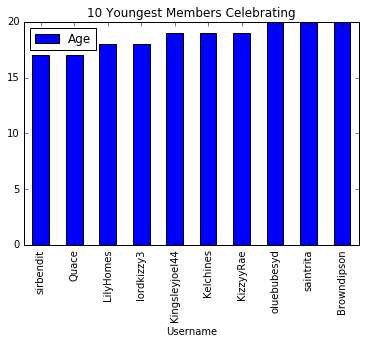

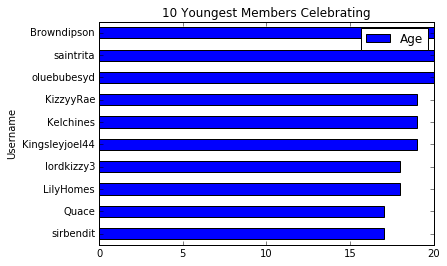

In [18]:
# To display the plot within the Jupyter notebook
%matplotlib inline

youngest_10.plot(x="Username", y="Age", kind="bar", title="10 Youngest Members Celebrating")

youngest_10.plot(x="Username", y="Age", kind="barh", title="10 Youngest Members Celebrating")



### Lets calculate the percentage of the First 10 youngest members celebrants, so we can plot pie chat with it

In [19]:
# Let see the data of 10 youngest members
youngest_10

,Username,Age,Date,Age_10_Plus,Age_at_2005
6,sirbendit,17,2016-08-19,27,6
41,Quace,17,2016-08-19,27,6
75,LilyHomes,18,2016-08-19,28,7
92,lordkizzy3,18,2016-08-19,28,7
66,Kingsleyjoel44,19,2016-08-19,29,8
15,Kelchines,19,2016-08-19,29,8
81,KizzyyRae,19,2016-08-19,29,8
55,oluebubesyd,20,2016-08-19,30,9
73,saintrita,20,2016-08-19,30,9
78,Browndipson,20,2016-08-19,30,9


In [20]:
# Lets find the sum of the ages

sum_youngest_10 = youngest_10["Age"].sum()

sum_youngest_10

187

In [21]:
# Lets find the percentage of each first 10 youngest members and save it in a new column "Percentage"

youngest_10["Percentage"] = (youngest_10["Age"] * 100) / (sum_youngest_10)


# Nowlets check the new dataframe first 10 youngest members

youngest_10

,Username,Age,Date,Age_10_Plus,Age_at_2005,Percentage
6,sirbendit,17,2016-08-19,27,6,9.090909
41,Quace,17,2016-08-19,27,6,9.090909
75,LilyHomes,18,2016-08-19,28,7,9.625668
92,lordkizzy3,18,2016-08-19,28,7,9.625668
66,Kingsleyjoel44,19,2016-08-19,29,8,10.160428
15,Kelchines,19,2016-08-19,29,8,10.160428
81,KizzyyRae,19,2016-08-19,29,8,10.160428
55,oluebubesyd,20,2016-08-19,30,9,10.695187
73,saintrita,20,2016-08-19,30,9,10.695187
78,Browndipson,20,2016-08-19,30,9,10.695187


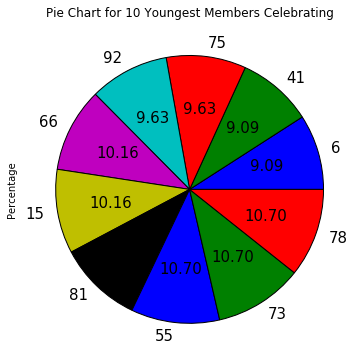

In [22]:
# to plot the pie chat of the Percentage column above

youngest_10["Percentage"].plot.pie(autopct='%.2f', fontsize=15, figsize=(6, 6), title="Pie Chart for 10 Youngest Members Celebrating")

### Lets plot from the main dataframe "df" above

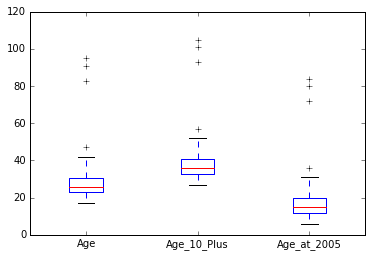

In [23]:
# box plot on df for the three columns, if there are outliers you will see them
"""In statistics, an outlier is an observation point that is distant from other observations.
An outlier may be due to variability in the measurement or it may indicate experimental error; 
the latter are sometimes excluded from the data set."""

df.plot.box()

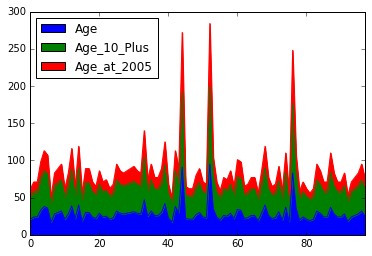

In [24]:
# Area plot, just to compare the three colums
df.plot.area()

# References

1) <a href="http://pandas.pydata.org/pandas-docs/stable/index.html">pandas: powerful Python data analysis toolkit</a>

2) <a href="https://www.analyticsvidhya.com/blog/2015/10/beginner-guide-web-scraping-beautiful-soup-python/">Beginner’s guide to Web Scraping in Python (using BeautifulSoup)</a>

3) <a href="https://first-web-scraper.readthedocs.io/en/latest/">First web scraper</a>

4) <a href="http://docs.python-guide.org/en/latest/scenarios/scrape/">HTML Scraping </a>


To read the blog post about this NoteBook, visit: http://umar-yusuf.blogspot.com.ng/2016/08/Data-Srapping-Analysis-and-Visualization-with-Python.html